loading dataset...
...dataset loaded
starting preprocessing...
...preprocessing completed


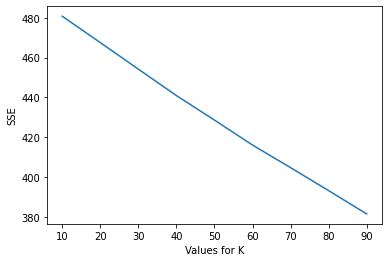

In [6]:
import  numpy as np
from sklearn.cluster import KMeans
from KmeanClustering import Kmeanclustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

sse={}
ntf,df = Kmeanclustering.main()

for k in np.arange(10,100,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ntf)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();